In [848]:
#import all libraries
import numpy as np 
import matplotlib.pyplot as plt  
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, RobustScaler,StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
from math import sqrt
warnings.filterwarnings('ignore')

In [849]:
# read the file
df2 = pd.read_csv('TIR_combined_90percentiledata_whole.csv')
df = df2.drop(['gene_name'],axis=1)
#df = df.drop(['gene_name','Unnamed: 0','A_count','C_count'],axis=1)
df

,romano_initiation_rate,gene_length,folding_energy_70,folding_energy_80,length of 5prime utr,kozak score,N1,N4,in_frame AUG
0,0.027500,705,-3.8,-4.8,32,7,1,1,0
1,0.027590,443,-12.8,-22.5,66,3,1,2,0
2,0.027750,634,-4,-9.9,113,5,3,1,0
3,0.028250,791,-11,-13.4,145,5,3,1,0
4,0.028400,1133,-8,-11.5,200,5,1,3,0
...,...,...,...,...,...,...,...,...,...
2754,0.193668,734,-11.3,-9.0,17,10,1,1,0
2755,0.195187,734,-11.3,-13.3,17,10,1,1,0
2756,0.191801,734,-13.6,-10.9,17,10,1,1,0
2757,0.210221,734,-11.3,-8.2,17,10,1,1,0


In [850]:
# Converting folding_energy_70 to float
df['folding_energy_70'] = pd.to_numeric(df['folding_energy_70'], errors='coerce')
# Fille NaN to 0 in folding_energy_70
df['folding_energy_70'] = df['folding_energy_70'].fillna(0)

In [851]:
#df = df.drop(['folding_energy_40','folding_energy_5p'], axis=1)

In [852]:
corr = df.corr()
print(corr.romano_initiation_rate.sort_values(ascending=False))

romano_initiation_rate    1.000000
kozak score               0.451888
folding_energy_80         0.272228
folding_energy_70         0.107742
gene_length               0.023751
N1                       -0.011903
N4                       -0.076881
in_frame AUG             -0.125127
length of 5prime utr     -0.308280
Name: romano_initiation_rate, dtype: float64


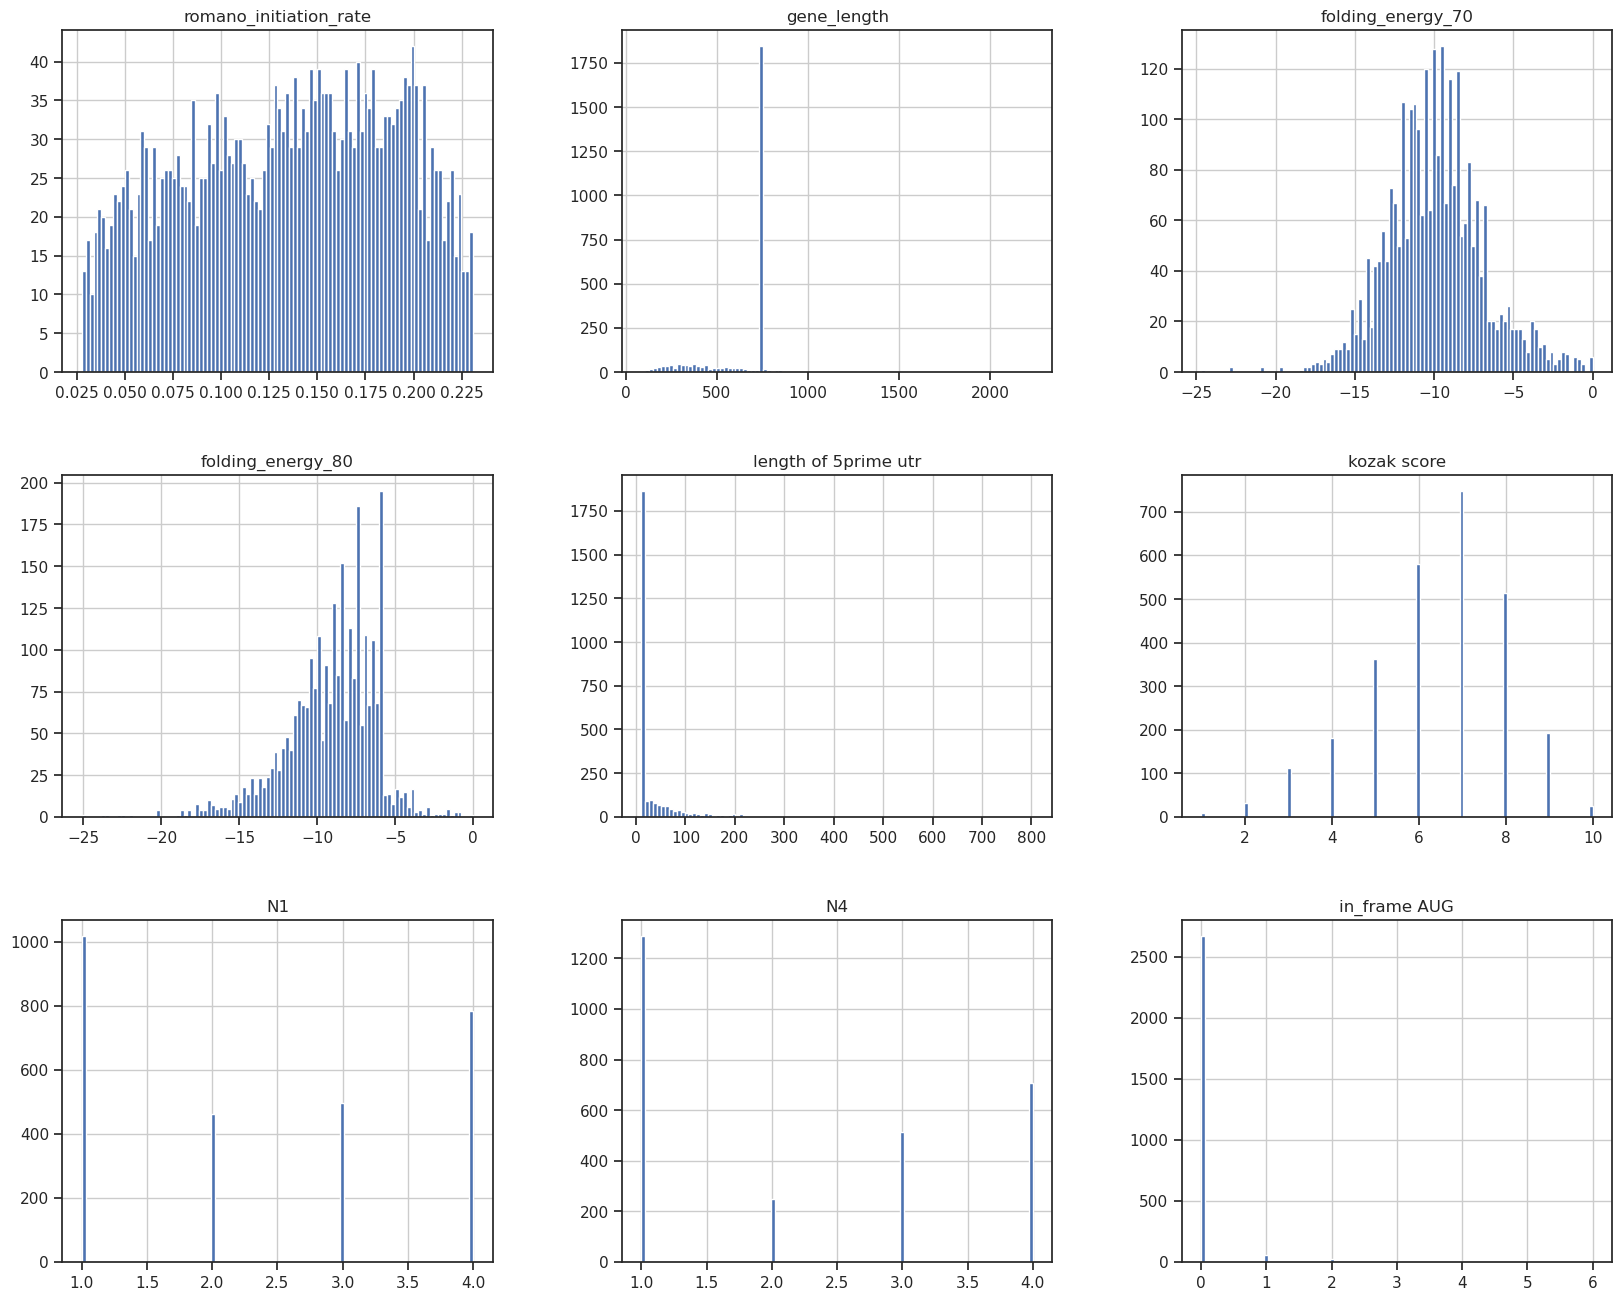

In [853]:
# Histogram plot of the dataframe
df.hist(bins=100, figsize=(20,16))
plt.show()

In [854]:
corr = df.corr()
print(corr.romano_initiation_rate.sort_values(ascending=False))

romano_initiation_rate    1.000000
kozak score               0.451888
folding_energy_80         0.272228
folding_energy_70         0.107742
gene_length               0.023751
N1                       -0.011903
N4                       -0.076881
in_frame AUG             -0.125127
length of 5prime utr     -0.308280
Name: romano_initiation_rate, dtype: float64


In [855]:
# Outlier removal based on histogram plot
df = df[(df['gene_length'] < 1200) & (df['gene_length'] > 100) & ( df['folding_energy_80'] > -17) 
        & ( df['folding_energy_80'] < -2) & (df['folding_energy_70'] > -17) & (df['length of 5prime utr'] < 275)
       ]

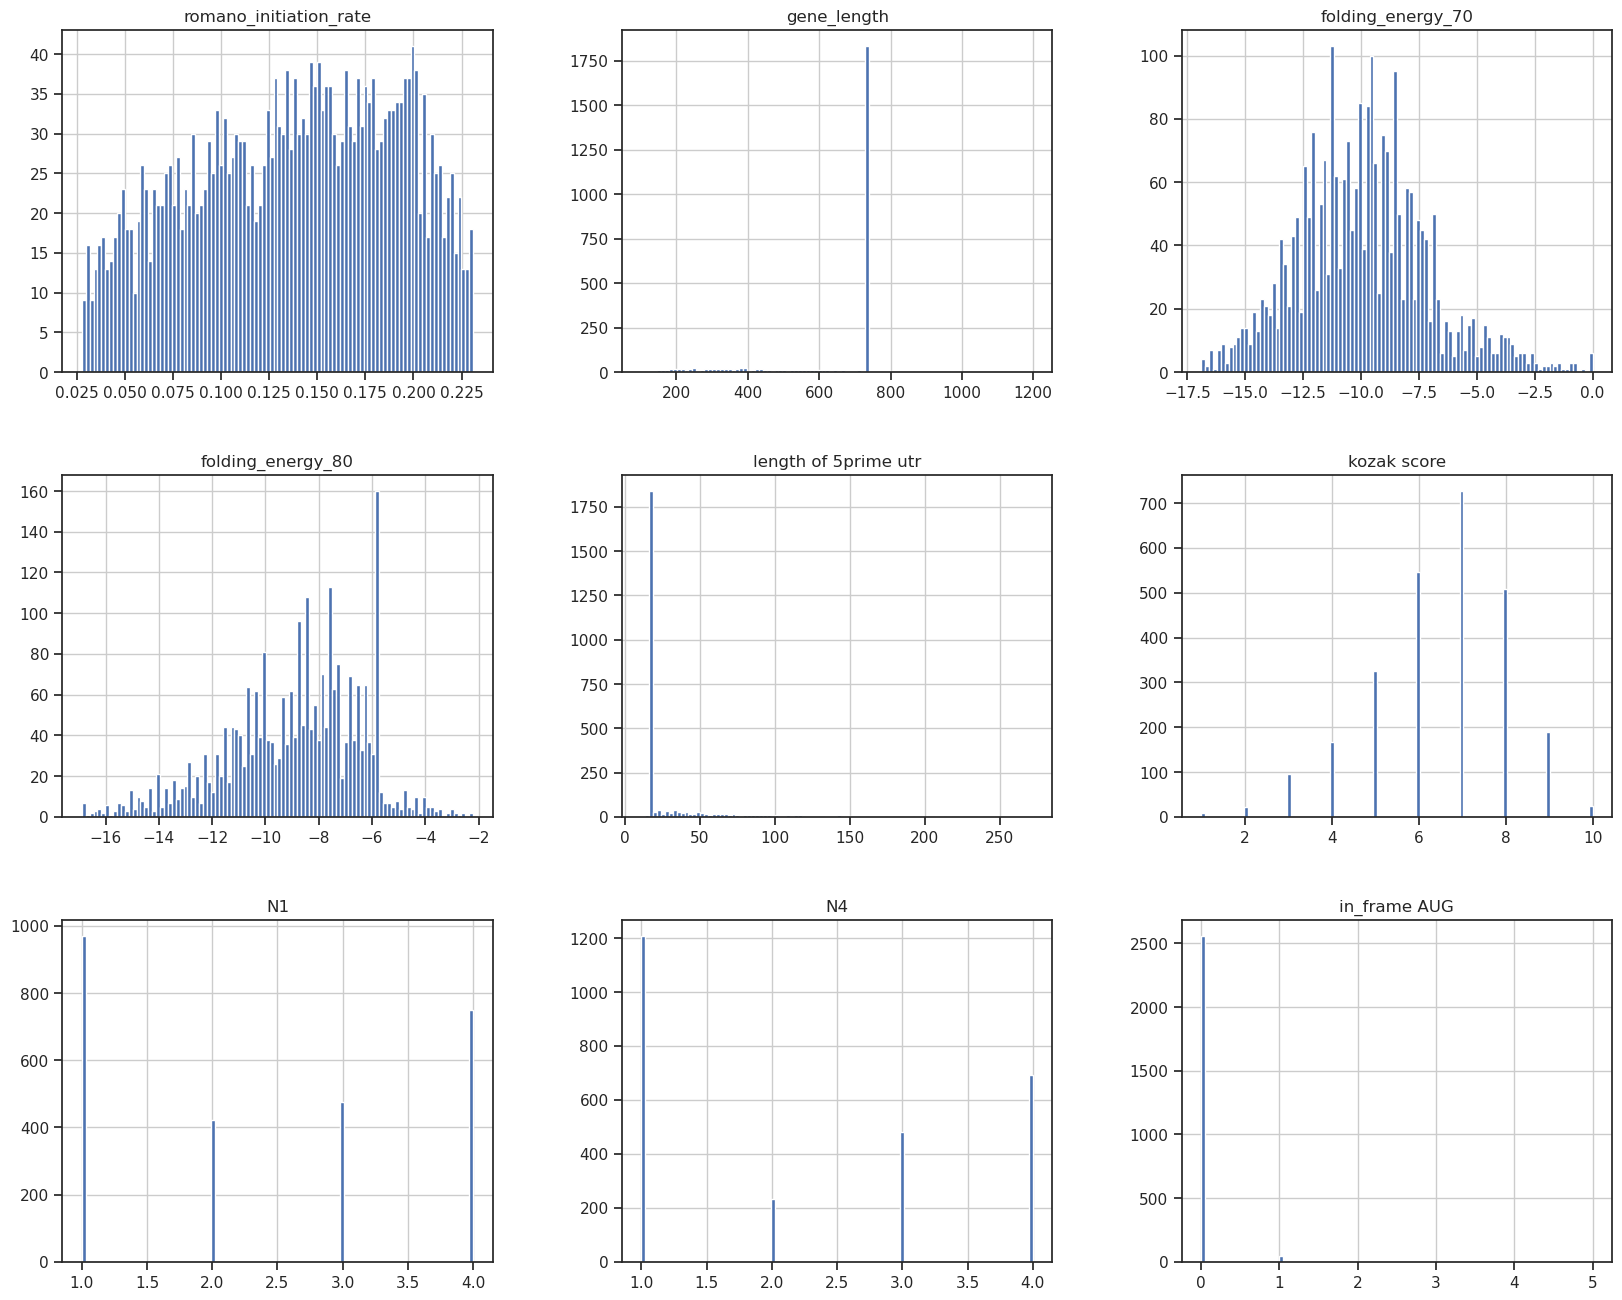

In [856]:
# Histogram plot of the dataframe
df.hist(bins=100, figsize=(20,16))
plt.show()

In [857]:
df.shape

(2617, 9)

In [858]:
1120-len(df)

-1497

In [859]:
corr = df.corr()
print(corr.romano_initiation_rate.sort_values(ascending=False))

romano_initiation_rate    1.000000
kozak score               0.444295
folding_energy_80         0.241308
gene_length               0.137634
folding_energy_70         0.106315
N1                       -0.015665
N4                       -0.091183
in_frame AUG             -0.126808
length of 5prime utr     -0.324125
Name: romano_initiation_rate, dtype: float64


In [860]:
df.columns

Index(['romano_initiation_rate', 'gene_length', 'folding_energy_70',
       'folding_energy_80', 'length of 5prime utr', 'kozak score', 'N1', 'N4',
       'in_frame AUG'],
      dtype='object')

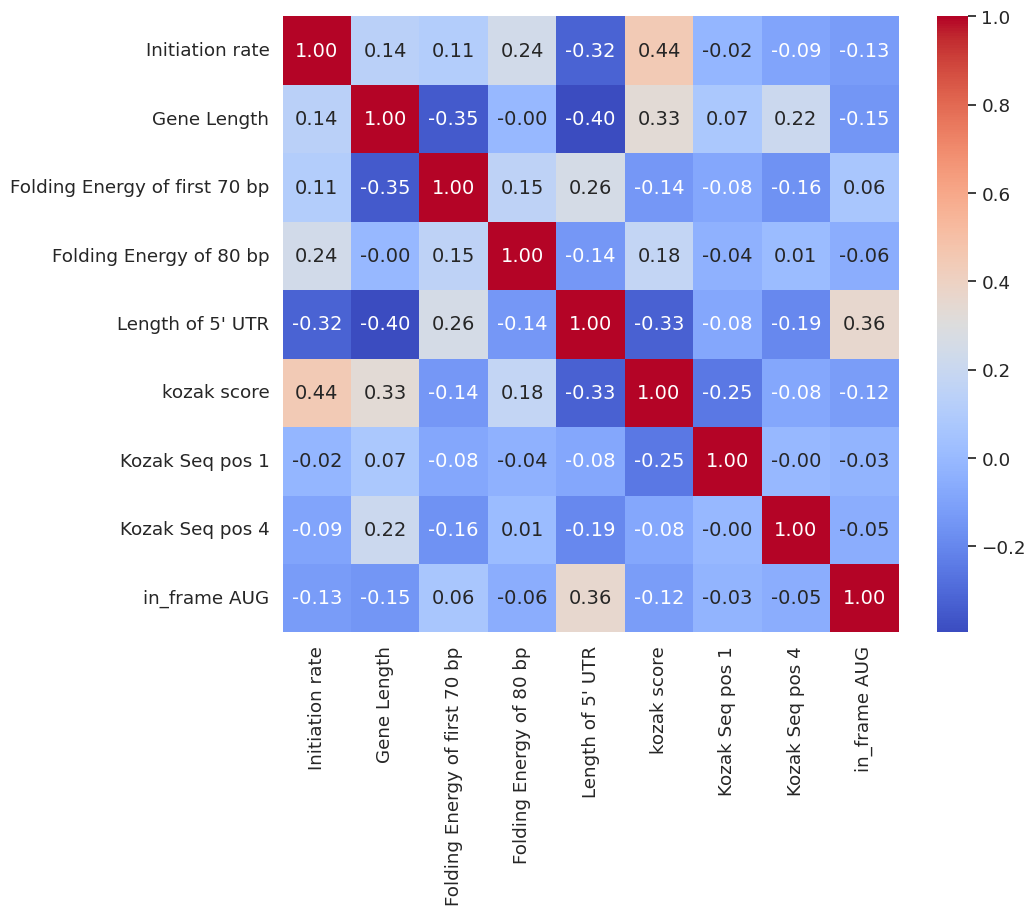

In [861]:

df_corr = df.rename(columns={'romano_initiation_rate': 'Initiation rate','gene_length':'Gene Length',
                    'folding_energy_70' : 'Folding Energy of first 70 bp',
                    'folding_energy_80' : 'Folding Energy of 80 bp', 
                    'length of 5prime utr' : "Length of 5' UTR",
                    'kozak_score': 'Kozak Score', 'N1' : 'Kozak Seq pos 1', 'N4': 'Kozak Seq pos 4',
                    'out_frame_AUG': 'Out frame AUG codon'}, 
                index={'Initiation rate': 'romano_initiation_rate','gene_length':'Gene Length',
                    'folding_energy_70' : 'Folding Energy of first 70 bp',
                    'folding_energy_80' : 'Folding Energy of 80 bp', 
                    'length of 5prime utr' : "Length of 5' UTR",
                    'kozak_score': 'Kozak Score', 'N1' : 'Kozak Seq pos 1', 'N4': 'Kozak Seq pos 4',
                    'out_frame_AUG': 'Out frame AUG codon'})

# Calculate correlation matrix
corr = df_corr.corr()

# Create heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={"size": 14}, fmt='.2f', square=True)

# Show plot
plt.show()

In [862]:
df

,romano_initiation_rate,gene_length,folding_energy_70,folding_energy_80,length of 5prime utr,kozak score,N1,N4,in_frame AUG
0,0.027500,705,-3.8,-4.8,32,7,1,1,0
2,0.027750,634,-4.0,-9.9,113,5,3,1,0
3,0.028250,791,-11.0,-13.4,145,5,3,1,0
4,0.028400,1133,-8.0,-11.5,200,5,1,3,0
5,0.028410,1083,-14.6,-14.6,32,4,2,3,0
...,...,...,...,...,...,...,...,...,...
2754,0.193668,734,-11.3,-9.0,17,10,1,1,0
2755,0.195187,734,-11.3,-13.3,17,10,1,1,0
2756,0.191801,734,-13.6,-10.9,17,10,1,1,0
2757,0.210221,734,-11.3,-8.2,17,10,1,1,0


In [863]:
X = df.drop('romano_initiation_rate',axis=1)
y = df['romano_initiation_rate']

In [864]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [865]:
# Create a parameter grid to search for best hyperparameters
param_grid = {
    'n_estimators': [10, 50, 100,150,200,250, 300, 350, 400, 450, 500],
    'max_depth': [3, 5, 7,10,20,25, 30,35, 40,45, 50],
    'learning_rate': [0.01, 0.1, 0.2,0.5, 1],
    'min_child_weight': [1, 3, 5,7,10]
}

In [866]:
# Create a XGBRegressor object
xgr = XGBRegressor(objective='reg:squarederror')
xgr_randomcv=RandomizedSearchCV(estimator=xgr,param_distributions=param_grid,n_iter=100,
                               cv=5,verbose=2,n_jobs=-1,random_state=42)

In [867]:
### fit the randomized model
xgr_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                      

In [868]:
model = xgr_randomcv.best_estimator_

In [869]:
# Define the cross validation method
kf = KFold(n_splits=5, shuffle=True)

In [870]:
data_train = pd.DataFrame(columns=['R square', 'Adjusted R square', 'Pearson R', 'MSE', 'MAE'])
data_test = pd.DataFrame(columns=['R square', 'Adjusted R square', 'Pearson R', 'MSE', 'MAE'])
y_test_preds = []  # To store predicted values for each fold
y_test_true = []  # To store true values for each fold

for train_index, test_index in kf.split(X):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

    ####### Train Set
    # Model Prediction
    y_train_pred = model.predict(X1_train)
    # R square
    r_sq_train = r2_score(y1_train, y_train_pred)
    # Adjusted R square
    adjusted_r_sq_train = 1 - (1 - r2_score(y1_train, y_train_pred)) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    # Pearson R
    r_train, _ = pearsonr(y1_train, y_train_pred)
    # Mean Squared Error
    mse_train = mean_squared_error(y1_train, y_train_pred)
    # Mean Absolute Error
    mae_train = mean_absolute_error(y1_train, y_train_pred)

    ####### Test Set
    # Model Prediction
    y_test_pred = model.predict(X1_test)
    # R square
    r_sq_test = r2_score(y1_test, y_test_pred)
    # Adjusted R square
    adjusted_r_sq_test = 1 - (1 - r2_score(y1_test, y_test_pred)) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    # Pearson R
    r_test, _ = pearsonr(y1_test, y_test_pred)
    # Mean Squared Error
    mse_test = mean_squared_error(y1_test, y_test_pred)
    # Mean Absolute Error
    mae_test = mean_absolute_error(y1_test, y_test_pred)

    data_train = pd.concat([data_train, pd.DataFrame({'R square': r_sq_train, 'Adjusted R square': adjusted_r_sq_train,
                                                      'Pearson R': r_train, 'MSE': mse_train, 'MAE': mae_train},
                                                     index=[0])], ignore_index=True)
    data_test = pd.concat([data_test, pd.DataFrame({'R square': r_sq_test, 'Adjusted R square': adjusted_r_sq_test,
                                                    'Pearson R': r_test, 'MSE': mse_test, 'MAE': mae_test},
                                                   index=[0])], ignore_index=True)

    y_test_preds.append(pd.Series(y_test_pred, index=y1_test.index))  # Append predicted values of the test set for each fold
    y_test_true.append(pd.Series(y1_test, index=y1_test.index))  # Append true values of the test set for each fold

print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)


data = pd.DataFrame({'True Values': pd.concat(y_test_true, axis=0).reset_index(drop=True),
                             'Predicted Values': pd.concat(y_test_preds, axis=0).reset_index(drop=True)})


(2094, 8) (2094,)
(523, 8) (523,)


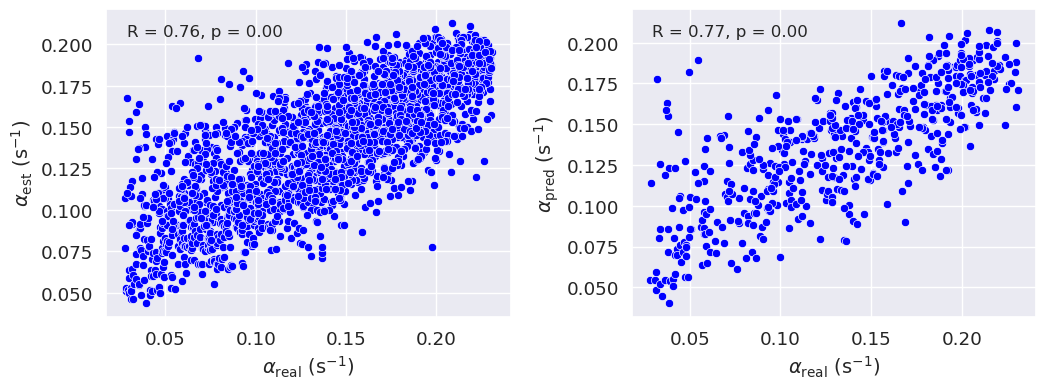

In [871]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# Training set
sns.scatterplot(y1_train, y_train_pred, color='blue', ax=ax1)
ax1.set_xlabel(r"$\alpha_\mathrm{real}\ (\mathrm{s^{-1}})$", fontsize=14)
ax1.set_ylabel(r"$\alpha_\mathrm{est}\ (\mathrm{s^{-1}})$", fontsize=14)
ax1.ticklabel_format(style='plain')
r_train, p_train = pearsonr(y1_train, y_train_pred)
ax1.text(0.05, 0.95, f"R = {r_train:.2f}, p = {p_train:.2f}", transform=ax1.transAxes, fontsize=12, verticalalignment='top')

# Test set
sns.scatterplot(y1_test, y_test_pred, color='blue', ax=ax2)
ax2.set_xlabel(r"$\alpha_\mathrm{real}\ (\mathrm{s^{-1}})$", fontsize=14)
ax2.set_ylabel(r"$\alpha_\mathrm{pred}\ (\mathrm{s^{-1}})$", fontsize=14)
ax2.ticklabel_format(style='plain')
r_test, p_test = pearsonr(y1_test, y_test_pred)
ax2.text(0.05, 0.95, f"R = {r_test:.2f}, p = {p_test:.2f}", transform=ax2.transAxes, fontsize=12, verticalalignment='top')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)


Text(0.95, 0.95, 'Test set')

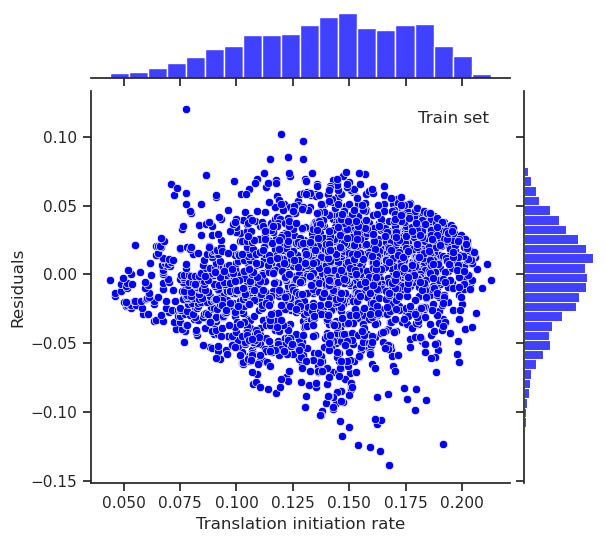

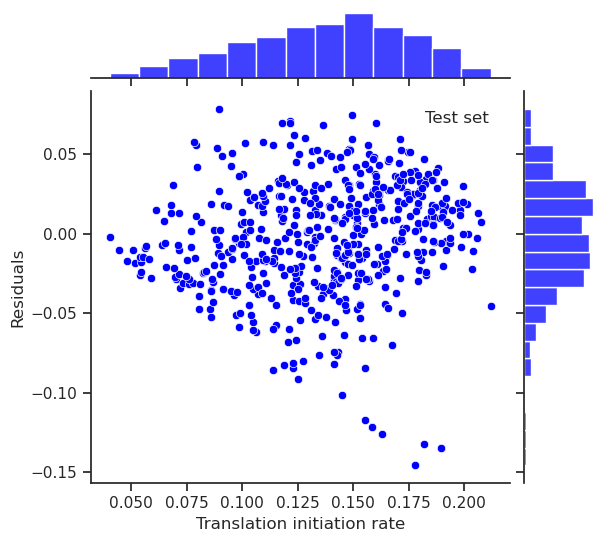

In [872]:
residuals = y1_train - y_train_pred

plot_data = pd.DataFrame()
plot_data['Residuals'] = residuals.ravel()
plot_data['Translation initiation rate'] = y_train_pred.ravel()

sns.set(style="ticks", font_scale=1)
ax = sns.jointplot(y='Residuals', x='Translation initiation rate', color='blue', data=plot_data, kind="scatter", height=6)
ax.fig.subplots_adjust(top=0.9)
ax.ax_joint.text(0.95, 0.95, "Train set", transform=ax.ax_joint.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

residuals = y1_test - y_test_pred

plot_data = pd.DataFrame()
plot_data['Residuals'] = residuals.ravel()
plot_data['Translation initiation rate'] = y_test_pred.ravel()

sns.set(style="ticks", font_scale=1)
ax = sns.jointplot(y='Residuals', x='Translation initiation rate', color='blue', data=plot_data, kind="scatter", height=6)
ax.fig.subplots_adjust(top=0.9)
ax.ax_joint.text(0.95, 0.95, "Test set", transform=ax.ax_joint.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

## Save Model as Pickle Object

In [873]:
import pickle
pickle.dump(model, open('tir_xgb_model.pkl', 'wb'))

## Comparison with other datasets

In [874]:
data

,True Values,Predicted Values
0,0.028400,0.051199
1,0.028410,0.053038
2,0.029360,0.051617
3,0.032280,0.046085
4,0.032800,0.055339
...,...,...
2612,0.199443,0.192280
2613,0.209591,0.198000
2614,0.216857,0.187725
2615,0.210079,0.172568


In [875]:
df2

,gene_name,romano_initiation_rate,gene_length,folding_energy_70,folding_energy_80,length of 5prime utr,kozak score,N1,N4,in_frame AUG
0,YEL011W,0.027500,705,-3.8,-4.8,32,7,1,1,0
1,YCR079W,0.027590,443,-12.8,-22.5,66,3,1,2,0
2,YBR021W,0.027750,634,-4,-9.9,113,5,3,1,0
3,YDR034C,0.028250,791,-11,-13.4,145,5,3,1,0
4,YKL105C,0.028400,1133,-8,-11.5,200,5,1,3,0
...,...,...,...,...,...,...,...,...,...,...
2754,RPL8A+YFP,0.193668,734,-11.3,-9.0,17,10,1,1,0
2755,RPL8A+YFP,0.195187,734,-11.3,-13.3,17,10,1,1,0
2756,RPL8A+YFP,0.191801,734,-13.6,-10.9,17,10,1,1,0
2757,RPL8A+YFP,0.210221,734,-11.3,-8.2,17,10,1,1,0


In [876]:
gene_name_new = []

for i in range(len(data)):
    if data['True Values'][i] in df2['romano_initiation_rate'].values:
        gene_name_new.append(df2.loc[df2['romano_initiation_rate'] == data['True Values'][i], 'gene_name'].iloc[0])
    else:
        gene_name_new.append(None)

data['gene_name'] = gene_name_new

# Removing gene RPL8A+YFP
data = data[data['gene_name'] != 'RPL8A+YFP']
data

,True Values,Predicted Values,gene_name
0,0.02840,0.051199,YKL105C
1,0.02841,0.053038,YLR071C
2,0.02936,0.051617,YOR219C
3,0.03228,0.046085,YML065W
4,0.03280,0.055339,YKL020C
...,...,...,...
2262,0.19707,0.179316,YNL036W
2263,0.19802,0.159999,YOL058W
2264,0.21225,0.165810,YCL050C
2265,0.21774,0.182876,YGL058W


In [877]:
df3 = pd.read_csv('data_final - data_final.csv')
df3 = df3.drop(['s_no.'], axis=1)
df3

,gene,romano_initiation_rate,gene_length,weinberg_initiation_rate,dou_duck_initiation_rate,metabolic_cost,cai,mRNA_half_life,protein_copy_number,protein_per_mRNA,...,N7,N8,N9,N10,N11,N12,GC,frac_GC,in_frame_AUG,out_frame_AUG
0,YAL008W,0.15050,199,0.276835,NaN,28.721106,0.115,27.5,1993.64239,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YBR255W,0.03368,695,NaN,NaN,25.125899,0.111,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YGR164W,0.27984,112,NaN,NaN,28.750000,0.119,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YGR131W,0.22936,175,NaN,NaN,28.242857,0.102,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNL003C,0.09958,285,NaN,NaN,26.849123,0.115,4.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6664,YPR117W,0.02378,2490,NaN,NaN,27.781526,0.122,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6665,YHR086W,0.05300,524,NaN,NaN,24.621183,0.124,5.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666,YBR015C,0.14430,598,0.067900,0.063924,27.790134,0.170,4.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6667,YPL013C,0.26796,122,0.117000,NaN,25.950820,0.087,4.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [878]:
weinberg_initiation_rate = []

for gene_name in data['gene_name']:
    if gene_name in df3['gene'].values:
        weinberg_initiation_rate.append(df3.loc[df3['gene'] == gene_name, 'weinberg_initiation_rate'].iloc[0])
    else:
        weinberg_initiation_rate.append(None)

df4 = data.copy() 
df4['weinberg_initiation_rate'] = weinberg_initiation_rate[:len(data)]  
df4 = df4[df4['weinberg_initiation_rate'] <= 0.25]
df4 = df4.dropna()
df4

,True Values,Predicted Values,gene_name,weinberg_initiation_rate
25,0.05093,0.096562,YBR158W,0.026600
39,0.05928,0.090661,YCR011C,0.070600
58,0.07675,0.068531,YJL050W,0.072000
59,0.07767,0.107863,YGL115W,0.071700
60,0.07778,0.137425,YMR105C,0.120000
...,...,...,...,...
2255,0.18394,0.131513,YMR311C,0.181000
2256,0.18687,0.191646,YPL135W,0.142071
2258,0.18859,0.128494,YBL064C,0.097400
2262,0.19707,0.179316,YNL036W,0.201000


In [879]:
dou_duck_initiation_rate = []

for gene_name in data['gene_name']:
    if gene_name in df3['gene'].values:
        dou_duck_initiation_rate.append(df3.loc[df3['gene'] == gene_name, 'dou_duck_initiation_rate'].iloc[0])
    else:
        dou_duck_initiation_rate.append(None)
df5 = data.copy() 
df5['dou_duck_initiation_rate'] = dou_duck_initiation_rate[:len(data)]  
df5 = df5.dropna()
df5

,True Values,Predicted Values,gene_name,dou_duck_initiation_rate
58,0.07675,0.068531,YJL050W,0.073371
73,0.08474,0.102914,YEL058W,0.066186
77,0.08936,0.089891,YER122C,0.101384
78,0.08992,0.089088,YDL040C,0.073808
96,0.10105,0.122434,YHR146W,0.181214
...,...,...,...,...
2248,0.15641,0.123522,YJR077C,0.080009
2251,0.16844,0.089751,YNL121C,0.087122
2257,0.18691,0.175466,YLR044C,0.153909
2258,0.18859,0.128494,YBL064C,0.096685


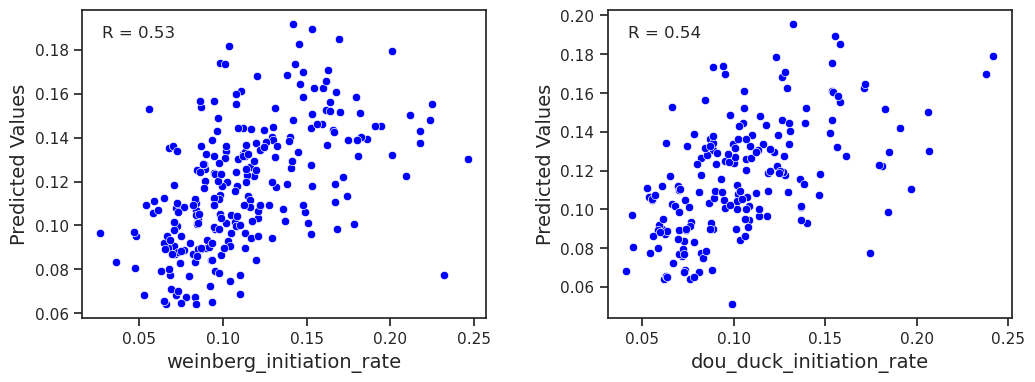

In [881]:
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# Scatter plot for the first subplot
sns.scatterplot(df4['weinberg_initiation_rate'], df4['Predicted Values'], color='blue', ax=ax1)
ax1.set_xlabel(r"weinberg_initiation_rate", fontsize=14)
ax1.set_ylabel(r"Predicted Values", fontsize=14)
ax1.ticklabel_format(style='plain')
r1, p1 = pearsonr(df4['weinberg_initiation_rate'], df4['Predicted Values'])
ax1.text(0.05, 0.95, f"R = {r1:.2f}", transform=ax1.transAxes, fontsize=12, verticalalignment='top')

# Scatter plot for the second subplot
sns.scatterplot(df5['dou_duck_initiation_rate'], df5['Predicted Values'], color='blue', ax=ax2)
ax2.set_xlabel(r"dou_duck_initiation_rate", fontsize=14)
ax2.set_ylabel(r"Predicted Values", fontsize=14)
ax2.ticklabel_format(style='plain')
r2, p2 = pearsonr(df5['dou_duck_initiation_rate'], df5['Predicted Values'])
ax2.text(0.05, 0.95, f"R = {r2:.2f}", transform=ax2.transAxes, fontsize=12, verticalalignment='top')


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
